In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

In [2]:
# 2
ori_path = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

In [3]:
#3
# if df_sum != None:
#     del df_sum
df_sum = pd.read_hdf('data_ori.h5','df')

In [ ]:
tmp_values = df_sum[df_sum['Station ID'] == 3]['Station ID'].values
print(tmp_values)

In [ ]:
df_sum[df_sum['Station ID'] ==3]

In [ ]:
df_sum.info('deep')

In [ ]:
len(df_sum)

In [ ]:
df_sum

In [4]:
# 4
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [ ]:
# 5 
def draw_lune_heatmap(df,res,lat=lat,log=log):
    # res refers to resolution
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
                #pairs ( offset, [pair])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 63.   0.   0.   0.  42.  17.   0.   0.   0.   0.]
 [ 47.   7.  27.   0.  41.  56. 121.  46.  36.   0.]
 [  0.   0. 111.  99.  57.  59.  40. 106.   0.   0.]
 [  0.  61.  71.  65.   0.  82.  62.   0.  76.   0.]
 [  0.  51.  11. 122.  68.   0.   0.  60.   0.   0.]
 [ 84.  81.  55.  72.  73.   0. 107.  31.  69.  95.]
 [103.  80.  96.   0.   0.  97. 100.  53.  19.  93.]
 [109.  87.   0.   0. 104.   

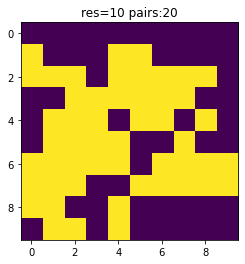

In [6]:
# 6
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

In [8]:
# dep
# 7-1 引入SA
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
def concat_squares(num_list):
    # df_sum = pd.DataFrame()
    max_length = 0
    max_num = 0
    for i,num in enumerate(num_list):
        file = ori_path+sub_prefix+str(num)+sub_suffix
        df = pd.read_csv(file,sep=' ',names=name)
        # df_sum = pd.concat([df_sum,df],axis=0)
        print(file,len(df))
        if len(df) > max_length:
            max_length = len(df)
            # max_df = df
            max_num = num
    # df_sum['Station ID'] = max_num
    return (max_num,num_list)

In [ ]:
for pair in pairs:
    print(pair[0],pair[1])

In [7]:
# 7 new
pair_max = []
# (max_id, pair_items)
for pair in pairs:
    tmp_dict ={}
    for item in pair[1]:
        # print(item)
        tmp_len = len(df_sum[df_sum['Station ID'] == item])
        tmp_dict[item] = tmp_len
        print(item,tmp_len)
    # print(np.max(tmp_array))
    # print(tmp_array == np.max(tmp_array))
    # print(tmp_dict.keys())
    # print(tmp_dict.items())
    tmp = sorted(tmp_dict.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)[0][0]
    pair_max.append((tmp,pair[1]))
    print('max id: ',tmp)
    # print(np.max(tmp_dict.values.items())
    # print(sorted(key_value.items(), key = lambda kv:(kv[1], kv[0])))    
    print('----')
pair_max = np.array(pair_max)
print(pair_max.T[0])
print(len(pair_max))
    

3 463366
23 508496
42 476141
max id:  23
----
5 473401
17 508058
max id:  17
----
21 516111
26 523660
41 492508
max id:  26
----
14 507791
30 459515
39 498798
56 348901
max id:  14
----
9 419401
15 507981
18 510324
24 515165
37 481248
44 502059
105 340836
121 1268694
max id:  121
----
12 495806
45 496420
46 509826
max id:  46
----
8 508506
25 486527
36 484879
max id:  8
----
64 307468
75 371510
99 254211
max id:  75
----
13 446626
40 465524
max id:  40
----
34 515546
43 474557
106 358605
max id:  34
----
70 477651
122 378219
max id:  70
----
49 449340
68 368898
max id:  49
----
66 448698
72 462363
max id:  72
----
54 447130
73 457270
max id:  73
----
32 486101
35 520571
50 452121
94 258488
107 367659
max id:  35
----
79 421204
95 366746
max id:  79
----
92 441339
97 455939
max id:  97
----
33 489204
53 481535
max id:  33
----
10 365048
19 468463
max id:  19
----
85 446444
89 457590
max id:  89
----
[23 17 26 14 121 46 8 75 40 34 70 49 72 73 35 79 97 33 19 89]
20
ipykernel_launcher:21: 

In [9]:
# 8-1
num_list = []
for pair in pairs:
    print(pair[1])
    res = concat_squares(pair[1])
    # print(np.unique(df['Station ID'].values))
    print(res)
    num_list.append(res)

[ 3 23 42]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-3.txt 463366
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-23.txt 508496
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-42.txt 476141
(23, array([ 3, 23, 42]))
[ 5 17]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-5.txt 473401
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-17.txt 508058
(17, array([ 5, 17]))
[21 26 41]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-21.txt 516111
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-26.txt 523660
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-41.txt 492508
(26, array([21, 26, 41]))
[14 30 39 56]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensor

In [10]:
num_list

[(23, array([ 3, 23, 42])),
 (17, array([ 5, 17])),
 (26, array([21, 26, 41])),
 (14, array([14, 30, 39, 56])),
 (121, array([  9,  15,  18,  24,  37,  44, 105, 121])),
 (46, array([12, 45, 46])),
 (8, array([ 8, 25, 36])),
 (75, array([64, 75, 99])),
 (40, array([13, 40])),
 (34, array([ 34,  43, 106])),
 (70, array([ 70, 122])),
 (49, array([49, 68])),
 (72, array([66, 72])),
 (73, array([54, 73])),
 (35, array([ 32,  35,  50,  94, 107])),
 (79, array([79, 95])),
 (97, array([92, 97])),
 (33, array([33, 53])),
 (19, array([10, 19])),
 (89, array([85, 89]))]

In [15]:
for item in pair_max:
    for id in item[1]:
        print(id)
    print('max',item[0])
    print('----')

3
23
42
max 23
----
5
17
max 17
----
21
26
41
max 26
----
14
30
39
56
max 14
----
9
15
18
24
37
44
105
121
max 121
----
12
45
46
max 46
----
8
25
36
max 8
----
64
75
99
max 75
----
13
40
max 40
----
34
43
106
max 34
----
70
122
max 70
----
49
68
max 49
----
66
72
max 72
----
54
73
max 73
----
32
35
50
94
107
max 35
----
79
95
max 79
----
92
97
max 97
----
33
53
max 33
----
10
19
max 19
----
85
89
max 89
----


In [24]:
for item in pair_max:
    for id in item[1]:
        df_sum.loc[df_sum['Station ID'] == id,'Station ID'] = item[0]
        print('ori',id,'max:',item[0])

ori 3 max: 23
ori 23 max: 23
ori 42 max: 23
ori 5 max: 17
ori 17 max: 17
ori 21 max: 26
ori 26 max: 26
ori 41 max: 26
ori 14 max: 14
ori 30 max: 14
ori 39 max: 14
ori 56 max: 14
ori 9 max: 121
ori 15 max: 121
ori 18 max: 121
ori 24 max: 121
ori 37 max: 121
ori 44 max: 121
ori 105 max: 121
ori 121 max: 121
ori 12 max: 46
ori 45 max: 46
ori 46 max: 46
ori 8 max: 8
ori 25 max: 8
ori 36 max: 8
ori 64 max: 75
ori 75 max: 75
ori 99 max: 75
ori 13 max: 40
ori 40 max: 40
ori 34 max: 34
ori 43 max: 34
ori 106 max: 34
ori 70 max: 70
ori 122 max: 70
ori 49 max: 49
ori 68 max: 49
ori 66 max: 72
ori 72 max: 72
ori 54 max: 73
ori 73 max: 73
ori 32 max: 35
ori 35 max: 35
ori 50 max: 35
ori 94 max: 35
ori 107 max: 35
ori 79 max: 79
ori 95 max: 79
ori 92 max: 97
ori 97 max: 97
ori 33 max: 33
ori 53 max: 33
ori 10 max: 19
ori 19 max: 19
ori 85 max: 89
ori 89 max: 89


In [37]:
total_id_uniq_new = np.unique(df_sum['Station ID'].values)
id_record_dict_new = {}
for item in total_id_uniq:
    id_record_dict_new[item]  = 0

for item in total_id_uniq_new:
    id_record_dict_new[item] = len(df_sum[df_sum['Station ID'] == item])

In [39]:
id_record_dict_new

{3: 0,
 5: 0,
 7: 131753,
 8: 1479912,
 9: 0,
 10: 0,
 11: 474258,
 12: 0,
 13: 0,
 14: 1815005,
 15: 0,
 17: 981459,
 18: 0,
 19: 833511,
 21: 0,
 23: 1448003,
 24: 0,
 25: 0,
 26: 1532279,
 27: 122838,
 30: 0,
 31: 475734,
 32: 0,
 33: 970739,
 34: 1348708,
 35: 2084940,
 36: 0,
 37: 0,
 39: 0,
 40: 912150,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 1502052,
 47: 132309,
 49: 818238,
 50: 0,
 51: 463746,
 53: 0,
 54: 0,
 55: 466390,
 56: 0,
 57: 409707,
 59: 275774,
 60: 462547,
 61: 267775,
 62: 325345,
 63: 287042,
 64: 0,
 65: 364818,
 66: 0,
 68: 0,
 69: 494813,
 70: 855870,
 71: 255942,
 72: 911061,
 73: 904400,
 75: 933189,
 76: 427241,
 79: 787950,
 80: 435960,
 81: 388750,
 82: 194407,
 84: 447777,
 85: 0,
 87: 462860,
 88: 384518,
 89: 904034,
 92: 0,
 93: 471416,
 94: 0,
 95: 0,
 96: 474777,
 97: 897278,
 98: 347117,
 99: 0,
 100: 481362,
 103: 453399,
 104: 455293,
 105: 0,
 106: 0,
 107: 0,
 109: 240373,
 111: 374388,
 121: 4545708,
 122: 0}

In [46]:
print('id','\tbefore','\t\tafter')
for id in total_id_uniq:
    print(id,'\t',id_record_dict[id],'\t',id_record_dict_new[id])

id 	before 		after
3 	 463366 	 0
5 	 473401 	 0
7 	 131753 	 131753
8 	 508506 	 1479912
9 	 419401 	 0
10 	 365048 	 0
11 	 474258 	 474258
12 	 495806 	 0
13 	 446626 	 0
14 	 507791 	 1815005
15 	 507981 	 0
17 	 508058 	 981459
18 	 510324 	 0
19 	 468463 	 833511
21 	 516111 	 0
23 	 508496 	 1448003
24 	 515165 	 0
25 	 486527 	 0
26 	 523660 	 1532279
27 	 122838 	 122838
30 	 459515 	 0
31 	 475734 	 475734
32 	 486101 	 0
33 	 489204 	 970739
34 	 515546 	 1348708
35 	 520571 	 2084940
36 	 484879 	 0
37 	 481248 	 0
39 	 498798 	 0
40 	 465524 	 912150
41 	 492508 	 0
42 	 476141 	 0
43 	 474557 	 0
44 	 502059 	 0
45 	 496420 	 0
46 	 509826 	 1502052
47 	 132309 	 132309
49 	 449340 	 818238
50 	 452121 	 0
51 	 463746 	 463746
53 	 481535 	 0
54 	 447130 	 0
55 	 466390 	 466390
56 	 348901 	 0
57 	 409707 	 409707
59 	 275774 	 275774
60 	 462547 	 462547
61 	 267775 	 267775
62 	 325345 	 325345
63 	 287042 	 287042
64 	 307468 	 0
65 	 364818 	 364818
66 	 448698 	 0
6

In [48]:
np.max(total_id_uniq)

122

In [60]:
indices1 = np.zeros(np.max(total_id_uniq)+1)
indices2 = np.zeros(np.max(total_id_uniq)+1)

In [85]:
for item in np.linspace(0,122,122,dtype=int):
    print(item,indices1[item],indices2[item])

0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 463366.0 0.0
4 0.0 0.0
5 473401.0 0.0
6 0.0 0.0
7 131753.0 131753.0
8 508506.0 1479912.0
9 419401.0 0.0
10 365048.0 0.0
11 474258.0 474258.0
12 495806.0 0.0
13 446626.0 0.0
14 507791.0 1815005.0
15 507981.0 0.0
16 0.0 0.0
17 508058.0 981459.0
18 510324.0 0.0
19 468463.0 833511.0
20 0.0 0.0
21 516111.0 0.0
22 0.0 0.0
23 508496.0 1448003.0
24 515165.0 0.0
25 486527.0 0.0
26 523660.0 1532279.0
27 122838.0 122838.0
28 0.0 0.0
29 0.0 0.0
30 459515.0 0.0
31 475734.0 475734.0
32 486101.0 0.0
33 489204.0 970739.0
34 515546.0 1348708.0
35 520571.0 2084940.0
36 484879.0 0.0
37 481248.0 0.0
38 0.0 0.0
39 498798.0 0.0
40 465524.0 912150.0
41 492508.0 0.0
42 476141.0 0.0
43 474557.0 0.0
44 502059.0 0.0
45 496420.0 0.0
46 509826.0 1502052.0
47 132309.0 132309.0
48 0.0 0.0
49 449340.0 818238.0
50 452121.0 0.0
51 463746.0 463746.0
52 0.0 0.0
53 481535.0 0.0
54 447130.0 0.0
55 466390.0 466390.0
56 348901.0 0.0
57 409707.0 409707.0
58 0.0 0.0
59 275774.0 275774.0
60 46254

In [61]:
for item in total_id_uniq:
    indices1[item] = id_record_dict[item]

In [63]:
for item in total_id_uniq_new:
    indices2[item] = id_record_dict_new[item]

In [80]:
np.linspace(0,122,123)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122.])

<BarContainer object of 123 artists>

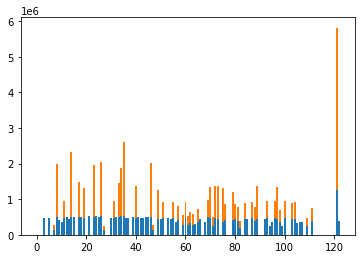

In [96]:
# Vital Figure
plt.bar(np.linspace(0,122,123,dtype=int),indices1)
plt.bar(np.linspace(0,122,123,dtype=int),indices2,bottom=indices1)

In [99]:
indices = np.linspace(0,122,123,dtype=int)
print(indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]


In [94]:
print(indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123]


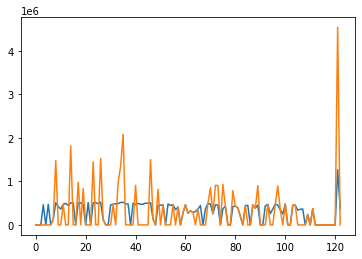

In [72]:
plt.plot(indices1)
plt.plot(indices2)

In [64]:
print(indices2)

[      0.       0.       0.       0.       0.       0.       0.  131753.
 1479912.       0.       0.  474258.       0.       0. 1815005.       0.
       0.  981459.       0.  833511.       0.       0.       0. 1448003.
       0.       0. 1532279.  122838.       0.       0.       0.  475734.
       0.  970739. 1348708. 2084940.       0.       0.       0.       0.
  912150.       0.       0.       0.       0.       0. 1502052.  132309.
       0.  818238.       0.  463746.       0.       0.       0.  466390.
       0.  409707.       0.  275774.  462547.  267775.  325345.  287042.
       0.  364818.       0.       0.       0.  494813.  855870.  255942.
  911061.  904400.       0.  933189.  427241.       0.       0.  787950.
  435960.  388750.  194407.       0.  447777.       0.       0.  462860.
  384518.  904034.       0.       0.       0.  471416.       0.       0.
  474777.  897278.  347117.       0.  481362.       0.       0.  453399.
  455293.       0.       0.       0.       0.  2403

In [62]:
print(indices1)

[      0.       0.       0.  463366.       0.  473401.       0.  131753.
  508506.  419401.  365048.  474258.  495806.  446626.  507791.  507981.
       0.  508058.  510324.  468463.       0.  516111.       0.  508496.
  515165.  486527.  523660.  122838.       0.       0.  459515.  475734.
  486101.  489204.  515546.  520571.  484879.  481248.       0.  498798.
  465524.  492508.  476141.  474557.  502059.  496420.  509826.  132309.
       0.  449340.  452121.  463746.       0.  481535.  447130.  466390.
  348901.  409707.       0.  275774.  462547.  267775.  325345.  287042.
  307468.  364818.  448698.       0.  368898.  494813.  477651.  255942.
  462363.  457270.       0.  371510.  427241.       0.       0.  421204.
  435960.  388750.  194407.       0.  447777.  446444.       0.  462860.
  384518.  457590.       0.       0.  441339.  471416.  258488.  366746.
  474777.  455939.  347117.  254211.  481362.       0.       0.  453399.
  455293.  340836.  358605.  367659.       0.  2403

In [50]:
len(total_id_uniq)

88

In [47]:
df_sum.to_hdf('df_sum_new','df_sum')

In [16]:
for item in num_list:
    for id in item[1]:
        print(id)
    print('max',item[0])
    print('-----')

3
23
42
max 23
-----
5
17
max 17
-----
21
26
41
max 26
-----
14
30
39
56
max 14
-----
9
15
18
24
37
44
105
121
max 121
-----
12
45
46
max 46
-----
8
25
36
max 8
-----
64
75
99
max 75
-----
13
40
max 40
-----
34
43
106
max 34
-----
70
122
max 70
-----
49
68
max 49
-----
66
72
max 72
-----
54
73
max 73
-----
32
35
50
94
107
max 35
-----
79
95
max 79
-----
92
97
max 97
-----
33
53
max 33
-----
10
19
max 19
-----
85
89
max 89
-----


In [ ]:
df_sum[df_sum['Station ID'] == id] = 89

In [ ]:
df_sum[df_sum["Station ID"] == 89]

In [ ]:
df_sum.loc[df_sum['Station ID'] == 3,'Station ID'] = 8888

In [ ]:
# 9
for item in num_list:
    for id in item[1]:
        # print(len(df))
        df_sum[df_sum['Station ID'] == id]['Station ID'] = item[0]
        # print(id,len(df_sum[df_sum['Station ID'] == id]))
    print(item[0],item[1])

In [19]:
total_id = df_sum['Station ID'].values
total_id_uniq = np.unique(total_id)
print(total_id_uniq,len(total_id_uniq))

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122] 88


In [22]:
# important
id_record_dict = {}
for id in total_id_uniq:
    id_record_dict[id] = len(df_sum[df_sum['Station ID'] == id])
    print(id,len(df_sum[df_sum['Station ID'] == id]))

3 463366
5 473401
7 131753
8 508506
9 419401
10 365048
11 474258
12 495806
13 446626
14 507791
15 507981
17 508058
18 510324
19 468463
21 516111
23 508496
24 515165
25 486527
26 523660
27 122838
30 459515
31 475734
32 486101
33 489204
34 515546
35 520571
36 484879
37 481248
39 498798
40 465524
41 492508
42 476141
43 474557
44 502059
45 496420
46 509826
47 132309
49 449340
50 452121
51 463746
53 481535
54 447130
55 466390
56 348901
57 409707
59 275774
60 462547
61 267775
62 325345
63 287042
64 307468
65 364818
66 448698
68 368898
69 494813
70 477651
71 255942
72 462363
73 457270
75 371510
76 427241
79 421204
80 435960
81 388750
82 194407
84 447777
85 446444
87 462860
88 384518
89 457590
92 441339
93 471416
94 258488
95 366746
96 474777
97 455939
98 347117
99 254211
100 481362
103 453399
104 455293
105 340836
106 358605
107 367659
109 240373
111 374388
121 1268694
122 378219


In [23]:
print(id_record_dict)

{3: 463366, 5: 473401, 7: 131753, 8: 508506, 9: 419401, 10: 365048, 11: 474258, 12: 495806, 13: 446626, 14: 507791, 15: 507981, 17: 508058, 18: 510324, 19: 468463, 21: 516111, 23: 508496, 24: 515165, 25: 486527, 26: 523660, 27: 122838, 30: 459515, 31: 475734, 32: 486101, 33: 489204, 34: 515546, 35: 520571, 36: 484879, 37: 481248, 39: 498798, 40: 465524, 41: 492508, 42: 476141, 43: 474557, 44: 502059, 45: 496420, 46: 509826, 47: 132309, 49: 449340, 50: 452121, 51: 463746, 53: 481535, 54: 447130, 55: 466390, 56: 348901, 57: 409707, 59: 275774, 60: 462547, 61: 267775, 62: 325345, 63: 287042, 64: 307468, 65: 364818, 66: 448698, 68: 368898, 69: 494813, 70: 477651, 71: 255942, 72: 462363, 73: 457270, 75: 371510, 76: 427241, 79: 421204, 80: 435960, 81: 388750, 82: 194407, 84: 447777, 85: 446444, 87: 462860, 88: 384518, 89: 457590, 92: 441339, 93: 471416, 94: 258488, 95: 366746, 96: 474777, 97: 455939, 98: 347117, 99: 254211, 100: 481362, 103: 453399, 104: 455293, 105: 340836, 106: 358605, 107